## HD 2039

Radial velocity data for HD2039 were obtained from 
[Tinney et al.(2003)](./references.md).


Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039-Tinney.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data
wgt = 100.0 / numpy.square( er )

We define a radial velocity model. It has 5 parameters: eccentricity, amplitude, period, phase of periastron, longitude of periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 0.0, 1000.0]
hilim = [0.9, 200.0, 1500.0]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )


Polynomial: f( x:p ) = p_0 +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>
Iteration   logZ        H     LowL     npar    parameters
   15086   -127.2     15.1   -108.9      7  [    6.225    0.725  160.377 1186.780    5.417 ...]
Engines              success     reject     failed       best      calls
GalileanEngine         95881      29899      40143         23      15086
ChordEngine           105438     221963          0         19      15086
Calls to LogL         493324   to dLogL      29899
Samples       15586
Evidence       -55.264 +-      0.075


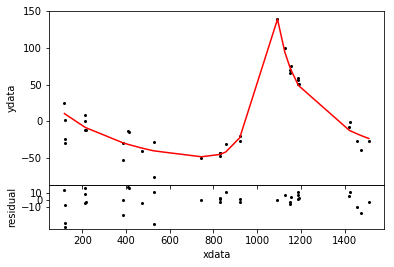

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, weights=wgt, seed=1301 )
ns.ensemble = 500
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )


The figure above is not so nice because it plotted only at measured points. They are relatively sparce and unequally spaced.
Try it with a model defined by more (equally spaced) data.

In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
pal = par.copy()
stl = std.copy()
pal[4] *= 180/math.pi
pal[5] *= 0.5 * pal[2] / math.pi
stl[4] *= 180 / math.pi
stl[5] *= 0.5 * pal[2] / math.pi
print( fmt( pal, max=None ) )
print( fmt( stl, max=None ) )
print( fmt( sl.scale ), fmt( sl.stdevScale ) )
print( evi )

[    5.313    0.724  157.852 1185.711    5.447    5.843]
[    3.383    0.043   22.943   42.515    0.215    0.072]
[    5.313    0.724  157.852 1185.711  312.092  146.795]
[    3.383    0.043   22.943   42.515   12.307    1.807]
   13.931     2.116
-55.26372178142216


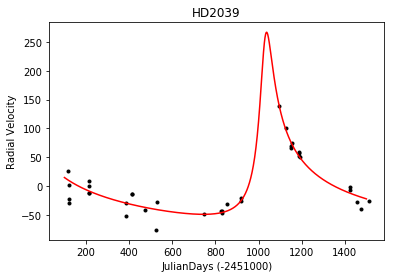

In [7]:
plt.plot( jd, rv, 'k. ' )
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.show()